In [22]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load the data

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data() # the data is in the form of two sequences

In [4]:
# reshape the images

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0    

In [5]:
# creating a custom callback class to stop training after achieve 99.8% accuracy

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.998):
            print("Reached 99.8% accuracy so cancelling training!")
            self.model.stop_training = True
            
callbacks = myCallback()

In [6]:
# create the model using the Sequential API

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [7]:
# compiling the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
# fitting the model

history = model.fit(x_train, y_train,
         epochs=20, batch_size=128,
         callbacks=[callbacks])

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 34s 571us/sample - loss: 0.0484 - accuracy: 0.9861
Epoch 2/20
60000/60000 [==============================] - 27s 444us/sample - loss: 0.0346 - accuracy: 0.9897
Epoch 3/20
60000/60000 [==============================] - 26s 438us/sample - loss: 0.0261 - accuracy: 0.9919
Epoch 4/20
60000/60000 [==============================] - 27s 442us/sample - loss: 0.0204 - accuracy: 0.9938
Epoch 5/20
60000/60000 [==============================] - 26s 435us/sample - loss: 0.0147 - accuracy: 0.9956
Epoch 6/20
60000/60000 [==============================] - 26s 430us/sample - loss: 0.0120 - accuracy: 0.9963
Epoch 7/20
60000/60000 [==============================] - 26s 435us/sample - loss: 0.0084 - accuracy: 0.9978
Epoch 8/20
60000/60000 [==============================] - 27s 445us/sample - loss: 0.0072 - accuracy: 0.9979
Epoch 9/20
60000/60000 [==============================] - 25s 417us/sample - loss: 0.0046 - accuracy: 0.9

In [12]:
frame = pd.DataFrame(history.history)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

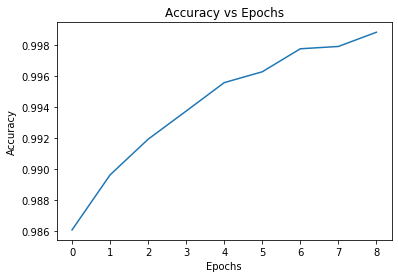

In [13]:
acc_plot = frame.plot(y='accuracy', title='Accuracy vs Epochs', legend=False)
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

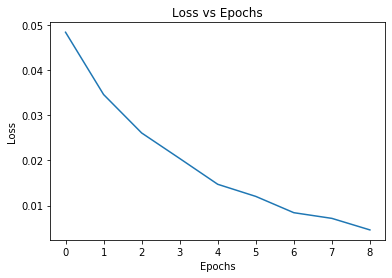

In [14]:
acc_plot = frame.plot(y='loss', title='Loss vs Epochs', legend=False)
acc_plot.set(xlabel='Epochs', ylabel='Loss')

In [15]:
def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels, verbose=2)
    return (test_loss, test_accuracy)

In [17]:
test_loss, test_accuracy = evaluate_model(model, x_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

10000/1 - 3s - loss: 0.0252 - accuracy: 0.9854
Test loss: 0.050294277297757435
Test accuracy: 0.9854000210762024


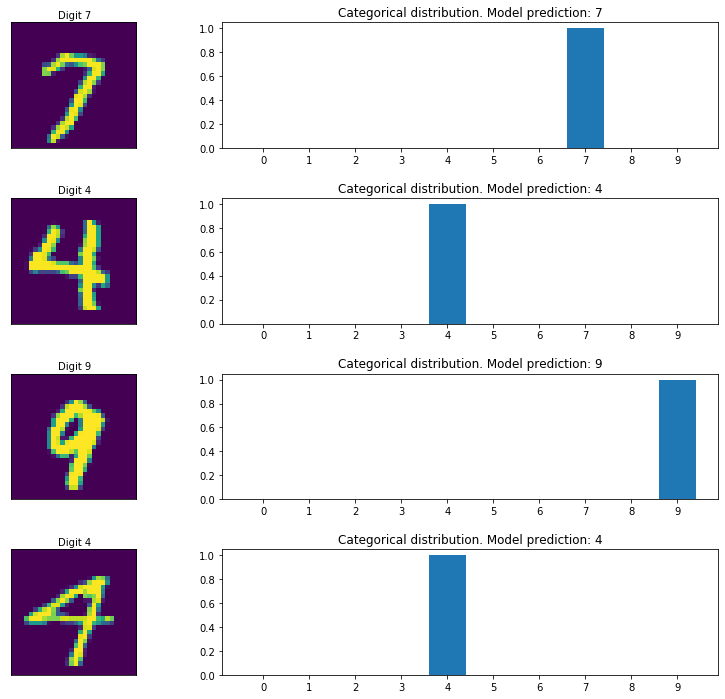

In [23]:
num_test_images = x_test.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = x_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()